In [66]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import reflexxes

# plot the data
def on_key_press(event):
    if event.key == 'escape':
        plt.close()

In [69]:
def original_plot(x, dd, dddx):
    t = np.linspace(0, len(x) * gen.cycle_time, len(x))
    fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    fig.canvas.mpl_connect('key_press_event', on_key_press)
    ax1.plot(t, x)
    ax1.set_ylabel('position')
    ax1.legend('123', title='DOF #')
    ax2.plot(t, dx)
    ax2.set_ylabel('velocity')
    ax2.legend('123', title='DOF #')
    ax3.plot(t, ddx)
    ax3.set_ylabel('acceleration')
    ax3.legend('123', title='DOF #')
    ax3.set_xlabel('time')
    plt.show()
    
def new_plot(x):
    x = np.array(x)
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    plt.title('Trajectory')
    xline = x[:,0]
    yline = x[:,1]
    zline = x[:,2]
    ax.plot3D(xline, yline, zline, 'green')

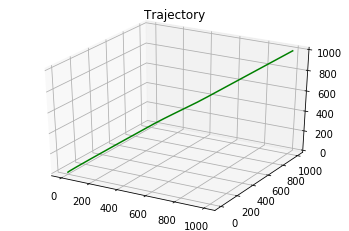

In [95]:
'''
explicit PositionTrajectoryGenerator(unsigned number_of_dofs,
                                    double cycle_time,
                                    const RMLDoubleVector& max_velocity,
                                    const RMLDoubleVector& max_acceleration,
                                    const RMLDoubleVector& max_jerk)
'''
gen = reflexxes.extra.PositionTrajectoryGenerator(
    number_of_dofs=3,
    cycle_time=0.001,
    max_velocity=[100, 100, 100],
    max_acceleration=[8, 8, 8],
    max_jerk=[4, 4, 4]
)

# set initial values
gen.current_position = [0, 0, 0]
gen.current_velocity = [1, 2, 3]
gen.current_acceleration = [0, 0, 0]

x = [gen.current_position.tolist()]
dx = [gen.current_velocity.tolist()]
ddx = [gen.current_acceleration.tolist()]

# generate trajectory
for pos, vel, acc in gen.trajectory([1000, 1000, 1000], [0, 0, 0], 10):
    '''
    auto trajectory(const RMLDoubleVector& target_position,
                    const RMLDoubleVector& target_velocity,
                    double min_sync_time = 0.0)
    '''
    x.append(pos)
    dx.append(vel)
    ddx.append(acc)
    
new_plot(x)